This Notebook will plot some histograms for data gathered from Mastodon instances.

Firstly, we load all the data that was previously gathered from all Mastodon instances. If your file path differs, you need to change it down below.

In [65]:
from numpy import triu, ones_like
from seaborn import set_theme, color_palette, heatmap
from mastodon_search.instance_data import analyze
from matplotlib.pyplot import xticks, savefig, tight_layout

In [54]:
filepath='../data/instance_data.jsonl'

In [55]:
with open(filepath, 'r') as file:
    an = analyze.Analyzer(file)
df = an.df
df

Number of fediverse instances in input file: 22178
Removed for (partially) no data: 11822
↳ Almost all of these instances run fediverse software other than Mastodon, some run Mastodon with a non-public API.
Removed duplicates: 2
Remaining: 10354


,total_users,monthly_users,total_statuses,mean_weekly_statuses,mean_weekly_logins,mean_weekly_registrations
instance,,,,,,
0371.uk,1,1,125,3.50,1.00,0.0
0ab.uk,2,2,14,0.00,0.50,0.0
0rb.it,7,2,626,0.00,1.50,0.0
0v0.ch,1,1,46,0.50,1.00,0.0
0x3c.pl,91,9,2305,1.00,5.00,0.0
...,...,...,...,...,...,...
zusammenhalt.de,1,1,32,5.75,1.00,0.0
zusammenkunft.net,2,2,5164,69.00,2.00,0.0
zweibruecken.social,3,2,497,0.75,1.25,0.0


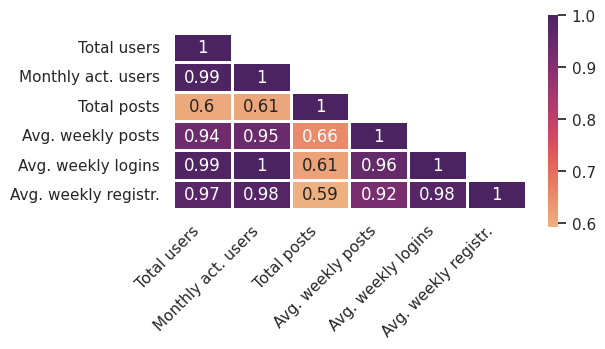

In [66]:
set_theme(style="white")

df_plot = df.copy()
df_plot.rename(columns={
    "total_users": "Total users",
    "monthly_users": "Monthly act. users",
    "total_statuses": "Total posts",
    "mean_weekly_statuses": "Avg. weekly posts",
    "mean_weekly_logins": "Avg. weekly logins",
    "mean_weekly_registrations": "Avg. weekly registr.",
}, inplace=True)

# Compute the correlation matrix
corr = df_plot.corr()

# Generate a mask for the upper triangle
mask = triu(ones_like(corr, dtype=bool), 1)


# Generate a custom diverging colormap
cmap = color_palette("flare", as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
ax = heatmap(
    data=corr,
    mask=mask,
    cmap=cmap,
    square=True,
    annot=corr,
    linewidths=2,
    cbar_kws={
        "shrink": 0.53
    },
)
ax.set_aspect(1/2)
xticks(rotation=45, ha="right")
tight_layout()
savefig("../data/correlations-instance-activity.pdf")